# Project: Investigate a Dataset - NoShowAppointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

>● **‘ScheduledDay’** tells us on what day the patient set up their appointment. 

>● **‘Neighborhood’** indicates the location of the hospital.

>● **‘Scholarship’** indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

>● Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


### Question(s) for Analysis
>1. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
>2. which age category is attending less? and what about at the most schedualed time?
>3. Are females having more scholoarships than males in the dataset? and what about the attendence for boht of them if they have and have not the scholarship?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

### Gathering data step

In [2]:
df= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Assessment step
-Number of both rows and columns of the data to have a good prespective and decide how to clean data wisly(e.g. if I can drop the missing values or replace them ) 

-Discovering types of data tells you if there is a wrong data type needs to be handled and if the type is 'object' discovering the first element of the column to know like the 'SchedualeddDay' column

-I have tried to discover whether there are missing or duplicated values also the data types and does it need cleaning ? 

-Number of unique values to check if there is something needs to be handled (e.g. " f " and " F " in gender column if it exists)


In [3]:
def Assessment(df):
    
    print('The data contains: {} columns and {} rows \n'.format(df.shape[1],df.shape[0])) 
    print('Here are types of the data: \n {} \n '.format(df.dtypes))
    print('Exploaring more about the data types of some confusing columns')
    print('The data type of schedualed day is {} \n '.format(type(df['ScheduledDay'][0])))
    print('The data type of Appointment day is {} \n'.format(type(df['AppointmentDay'][0])))
    print('Number of Nan values in the columns: \n {} \n'.format(df.isnull().sum()))
    print('Number of duplicated row: \n {} \n'.format(df.duplicated().sum()))
    print('Check the unique values of the columns: \n {}'.format(df.nunique()))   
          
Assessment(df)          

The data contains: 14 columns and 110527 rows 

Here are types of the data: 
 PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object 
 
Exploaring more about the data types of some confusing columns
The data type of schedualed day is <class 'str'> 
 
The data type of Appointment day is <class 'str'> 

Number of Nan values in the columns: 
 PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64 

Number of duplicated row: 
 0 

Check th


### Data Cleaning
- Both missing and duplicated values are okay
- For data types of both SchedualDay and AppointmentDay need to be converted from string to datetime for more effective analysis 
- There is no need to use some columns such as 'PatientId' and 'AppointmentID' where there is no varible inforamtion to be involved in the analysis
- Creating 'Age_categories' column to make the 'Age' column more accessible to analyze.


In [4]:
def cleaning(df):
    
    df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
    print('The new type of schedualed day is {}'.format(type(df['ScheduledDay'][0])))
    df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
    print('The new type of appointment day is {}'.format(type(df['AppointmentDay'][0])))
    df.drop(columns=['PatientId','AppointmentID'], axis =1, inplace =True)
    bin_edges = [0,14,24,64,200]
    bin_names =['children','youth','adults','seniors']
    df['Age_categories'] =pd.cut(df['Age'],bin_edges,labels = bin_names)
    cleaned_df = df.head()
    return cleaned_df
cleaning(df)

The new type of schedualed day is <class 'pandas._libs.tslibs.timestamps.Timestamp'>
The new type of appointment day is <class 'pandas._libs.tslibs.timestamps.Timestamp'>


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Age_categories
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,adults
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,adults
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,adults
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,children
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,adults


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?)

The city that contains the largest number of people having the appointment is ANDORINHAS
The city that contains the smallest number of people having the appointment is JARDIM DA PENHA


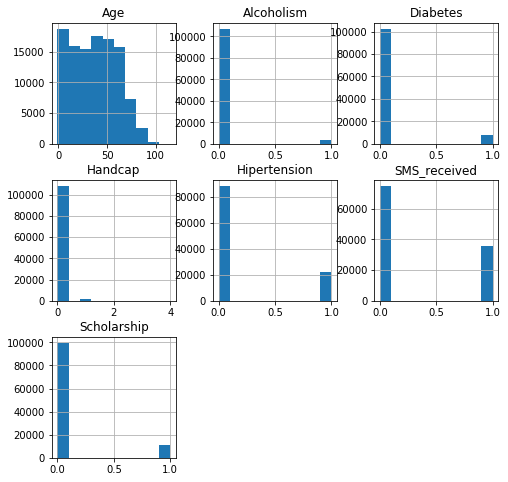

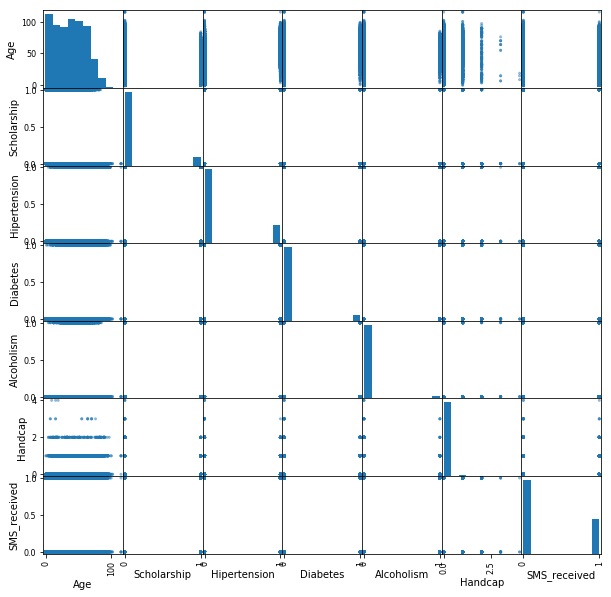

In [6]:
def General_exploration(df):
    print('The city that contains the largest number of people having the appointment is {}'.format(df['Neighbourhood'][df['Neighbourhood'].value_counts().max()]))
    print('The city that contains the smallest number of people having the appointment is {}'.format(df['Neighbourhood'][df['Neighbourhood'].value_counts().min()]))
   
 
    df.hist(figsize=(8,8));
    pd.plotting.scatter_matrix(df,figsize=(10,10));
General_exploration(df)

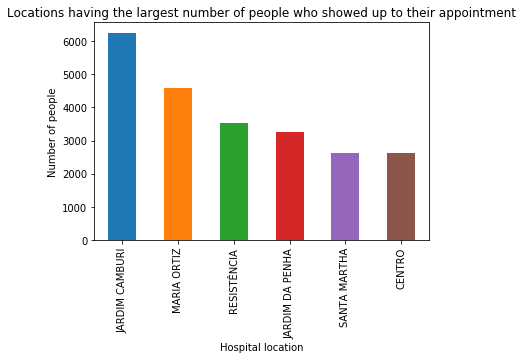

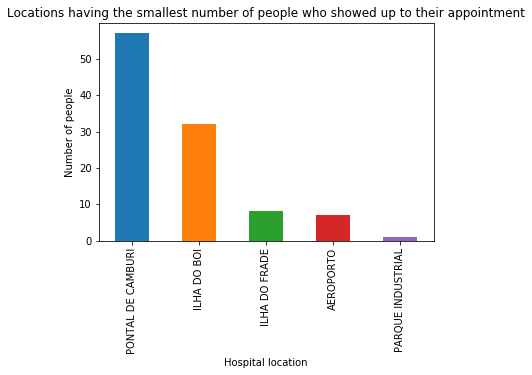

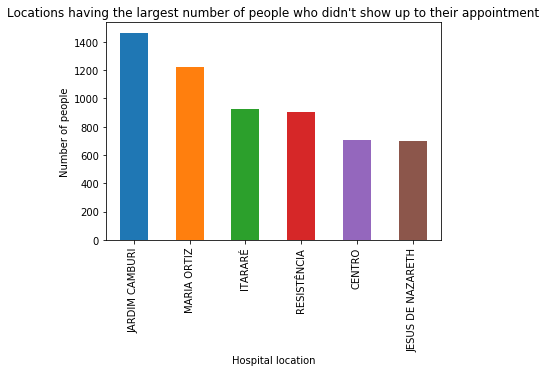

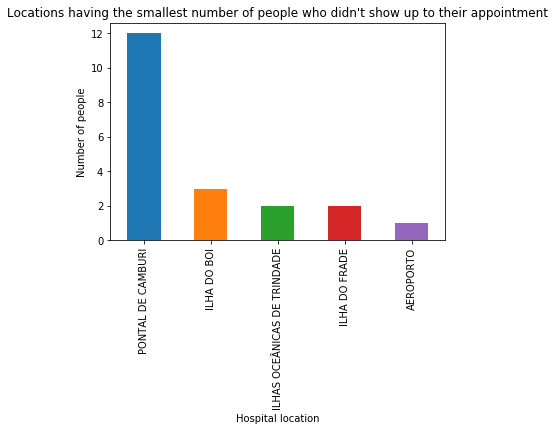

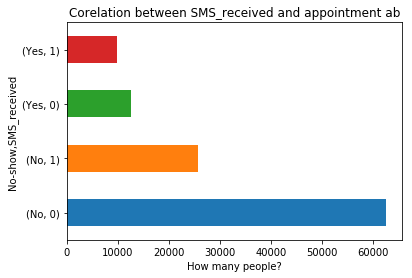

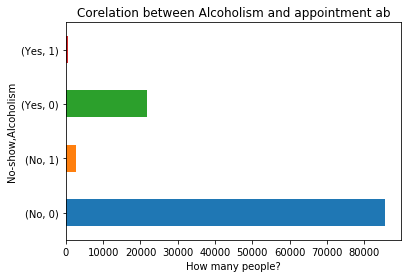

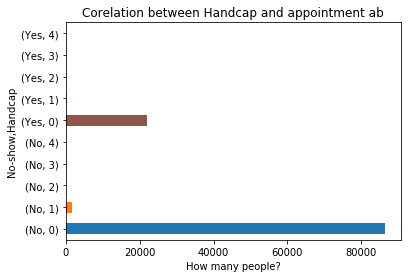

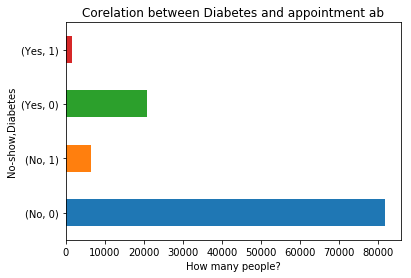

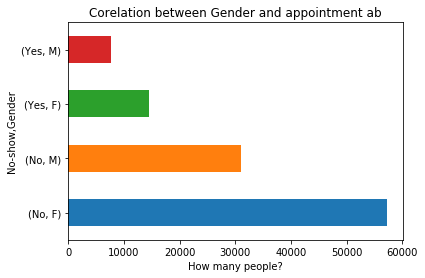

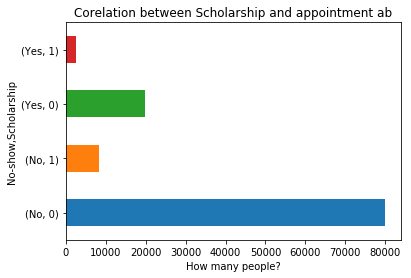

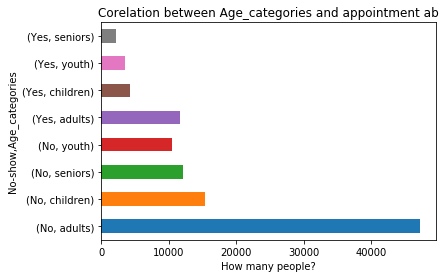

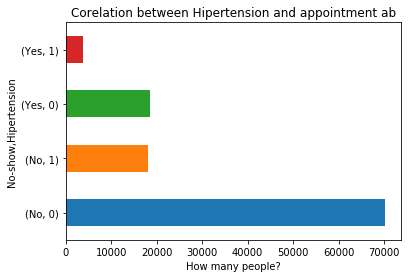

In [7]:
def Answer_1Q(df):
    no =df['Neighbourhood'][df['No-show'] == "No"].value_counts()
    yes =df['Neighbourhood'][df['No-show'] == "Yes"].value_counts()
    no[:6].plot(kind='bar')
    plt.title('Locations having the largest number of people who showed up to their appointment')
    plt.ylabel('Number of people')
    plt.xlabel('Hospital location')
    plt.figure('1')
    no[75:].plot(kind = 'bar')
    plt.title('Locations having the smallest number of people who showed up to their appointment')
    plt.ylabel('Number of people')
    plt.xlabel('Hospital location')
    plt.figure('2')
    yes[:6].plot(kind='bar')
    plt.title('Locations having the largest number of people who didn\'t show up to their appointment')
    plt.ylabel('Number of people')
    plt.xlabel('Hospital location')
    plt.figure('3')
    yes[75:].plot(kind='bar')
    plt.title('Locations having the smallest number of people who didn\'t show up to their appointment')
    plt.ylabel('Number of people')
    plt.xlabel('Hospital location')
    plt.figure('4')
    #print('The city that having largest number of people who showed up to their appointment is \n {}'.format(no.index[no == no.max()][0]))
    #print('The city that having smallest number of people who showed up to their appointment is \n {}'.format(no.index[no== no.min()][0]))
    #print('The city that having largest number of people who didn\'t show up to their appointment is \n {}'.format(yes.index[yes == yes.max()][0]))
    #print('The city that having smallest number of people who didn\'t show up to their appointment is \n {}'.format(yes.index[yes== yes.min()][0]))
    
    list_of_vars= list(df.columns)
    unwanted =['No-show', 'ScheduledDay','AppointmentDay', 'Neighbourhood','Age']
    cols =list(set(list_of_vars) - set(unwanted))
    for i in range(len(cols)):
        plt.subplots()
        df.groupby('No-show')['{}'.format(cols[i])].value_counts().plot(kind='barh');       
        plt.xlabel('How many people?')
        plt.title('Corelation between {} and appointment absence'.format(cols[i]))
       
    
    
Answer_1Q(df)   

### Research Question 2  (which age category is attending less? and what about at the most schedualed time?)

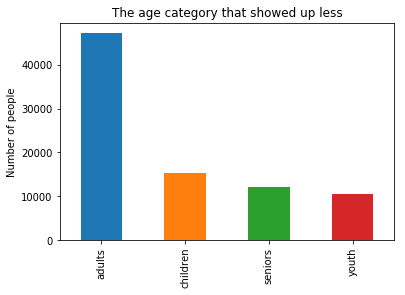

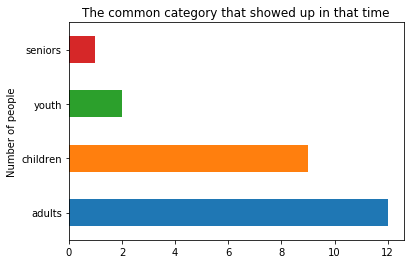

In [13]:
def Answer_2Q(df):
    plt.title('The age category that showed up less')
    df['Age_categories'][df['No-show']=="No"].value_counts().plot(kind='bar');
    plt.ylabel('Number of people')
    plt.figure('part_1')
   
    common_day =df['ScheduledDay'].mode()[0]
    df['Age_categories'][df['ScheduledDay'] == "2016-05-06 07:09:54"].value_counts().plot(kind='barh');
    plt.title('The common category that showed up in that time')
    plt.ylabel('Number of people')

    plt.figure('part_2')
    
Answer_2Q(df)


### Research Question 3 (Are females having more scholoarships than males in the dataset? and what about the attendence for boht of them if they have and have not the scholarship?)

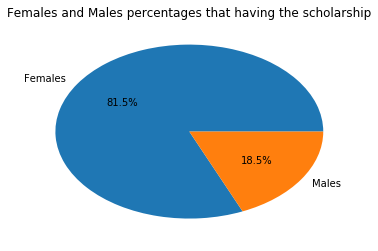

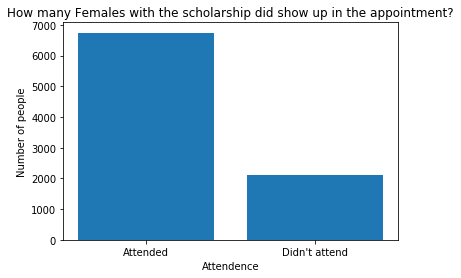

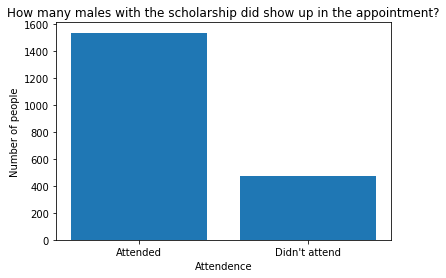

In [29]:
def Answer_3Q(df):
    plt.title('Females and Males percentages that having the scholarship')
    third1 =df.query('Scholarship == 1')['Gender'].value_counts()
    plt.pie(third1,autopct='%1.1f%%',labels=['Females','Males']);
    plt.figure('1')
         
    third2_f =df.query('Scholarship == 1')[['Gender','No-show']]
    f =third2_f.query('Gender == "F"')['No-show'].value_counts()
    attendence = ['Attended', 'Didn\'t attend']
    plt.bar(attendence,f);
    plt.title('How many Females with the scholarship did show up in the appointment?')
    plt.xlabel('Attendence')
    plt.ylabel('Number of people')
    plt.figure('2')
    
    third2 =df.query('Scholarship == 1')[['Gender','No-show']]
    m =third2.query('Gender == "M"')['No-show'].value_counts()
    plt.bar(attendence,m);
    plt.title('How many males with the scholarship did show up in the appointment?')
    plt.xlabel('Attendence')
    plt.ylabel('Number of people')
    plt.figure('3')
    
Answer_3Q(df)    
    
    

<a id='conclusions'></a>
## Conclusions

### Results: 
**The data suggests that:**

- Although the location has the maxmum number of people having the appointment is **ANDORINHAS**, but **JARDIM CAMBURI** is the one which has the largest number of people attending the appointment and  and although **JARDIM DA PENHA** location has the minmum number of people having the appointment, but **AEROPORTO** seems to have the smallest number of people who isn't attending.
- There are high number of adults in the dataset and they are also the most appearing and not appearing  group while the youth was the less appearing and the seinors less to not appear.
- Handicap patients specially are more likely to show up.
- In same way of SMS and scholarship factors which have some effect on attendence where they more people having them tend to show up in the appointment, people with disease(e.g.hypertention and diabetes) attend more compared to people who don't have any of the four.
- As the graph shows the Gender factor has an effect on the attendence due to the large number of females having  the appointment.
- Most of alcohol adictors have more tendency to attend showing strong correlation.


- The age category that less showed up is Youth category.
- Adults category the most common group that schedualed in the most common schedualed day.


- Females enroll in the Bolisa Familia porgram more than Males.
- Most of them both attend while they have scholarship.


### Limitations:
- Number of unique hospitals' locations in the data are 80 and not categorized to largre areas to lower their count for better analysis.
- Since most of the data varibles are categorical, a high level of statistical analysis is not allowed.

